In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1) 載入資料集

In [2]:
url = 'https://github.com/1010code/iris-dnn-tensorflow/raw/master/data/Iris.csv'
s=requests.get(url).content
df_train=pd.read_csv(io.StringIO(s.decode('utf-8')))
df_train = df_train.drop(labels=['Id'],axis=1) # 移除Id
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 2) 手動編碼
處理名目資料 (Nominal variables) - 資料前處理
依據特徵資料的特性，可以選擇手動編碼或自動編碼。

### 使用編碼時機?
進行深度學習時，神經網路只能處理數值資料。因此我們需要將所有非數字型態的特徵進行轉換。

ex:

|  Iris-setosa |  Iris-versicolor | Iris-virginica  |
|:---:|:---:|:---:|
|  1 | 2  | 3  |

In [3]:
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

#將編碼後的label map存至df_train['Species']中。
df_train['Class'] = df_train['Species'].map(label_map)

In [4]:
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


## 3) 檢查缺失值
使用 numpy 所提供的函式來檢查是否有 NA 缺失值，假設有缺失值使用dropna()來移除。使用的時機在於當只有少量的缺失值適用，若遇到有大量缺失值的情況，或是本身的資料量就很少的情況下建議可以透過機器學習的方法補值來預測缺失值。

```python
# 移除缺失值
train=train.dropna()
```

In [5]:
X = df_train.drop(labels=['Species','Class'],axis=1).values # 移除Species (因為字母不參與訓練)
# checked missing data
print("checked missing data(NAN mount):",len(np.where(np.isnan(X))[0]))

checked missing data(NAN mount): 0


## 4) 切割訓練集與測試集

In [6]:
from sklearn.model_selection import train_test_split
X=df_train.drop(labels=['Class','Species'],axis=1)
y=df_train['Class']
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.3 , random_state=42)

In [7]:
print('Training data shape:',X_train.shape)
print('Testing data shape:',X_test.shape)

Training data shape: (105, 4)
Testing data shape: (45, 4)


## PCA
Parameters:
- n_components: 指定PCA降維後的特徵維度數目。
- whiten: 是否進行白化True/False。白化意指，對降維後的數據的每個特徵進行正規化，即讓方差都為1、平均值為0。默認值為False。
- random_state: 亂數種子，設定常數能夠保證每次PCA結果都一樣。

Attributes:
- explained_variance_： array類型。降維後的各主成分的方差值，主成分方差值越大，則說明這個主成分越重要
- explained_variance_ratio_： array類型。降維後的各主成分的方差值佔總方差值的比例，主成分所佔比例越大，則說明這個主成分越重要。
- n_components_： int類型。返回保留的特徵個數。

Methods:
- fit(X,y)：把數據放入模型中訓練模型。
- fit_transform(X,[,y])all：訓練模型同時返回降維後的數據。
- transform(X)：對於訓練好的數據降維。

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, iterated_power=1)
train_reduced = pca.fit_transform(X_train)

print('PCA方差比: ',pca.explained_variance_ratio_)
print('PCA方差值:',pca.explained_variance_)

PCA方差比:  [0.91939858 0.05522612]
PCA方差值: [4.02578705 0.24181962]


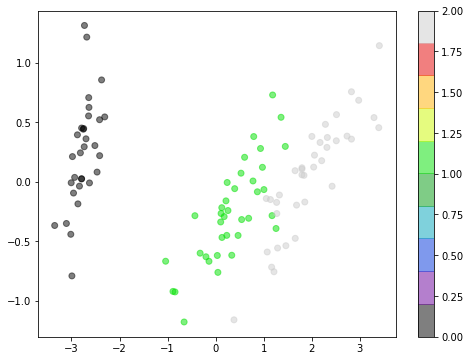

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(train_reduced[:, 0], train_reduced[:, 1], c=y_train, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.show()

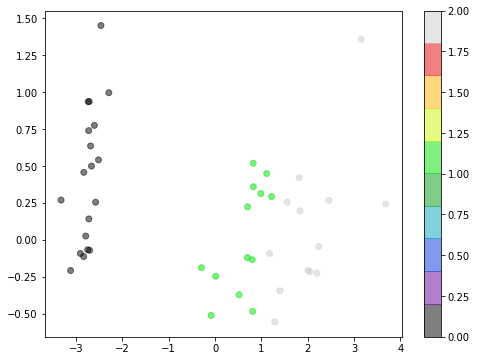

In [10]:
test_reduced = pca.transform(X_test)

plt.figure(figsize=(8,6))
plt.scatter(test_reduced[:, 0], test_reduced[:, 1], c=y_test, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.show()

### KernelPCA
KernelPCA模型類似於非線性支持向量機，使用核技巧處理非線性數據的降維，主要是選擇合適的核函數。

### IncrementalPCA
IncrementalPCA模型主要是為了解決計算機內存限制問題。工業上樣本量和維度都是非常大的，如果直接擬合數據，機器性能一般都無法支撐。IncrementalPCA則會將數據分成多個batch，然後對每個batch依次遞增調用partial_fit函數對樣本降維。

### SparsePCA
SparsePCA模型相較於普通的PCA區別在於使用了L1正則化，即對非主成分的影響降為0，避免了噪聲對降維的影響。

### MiniBatchSparsePCA
MiniBatchSparsePCA模型類似於SparsePCA，不同之處在於MiniBatchSparsePCA模型通過使用一部分樣本特徵和給定的迭代次數進行降維，以此來解決特徵分解過慢的問題。

## t-SNE
t-SNE使用了更複雜的公式來表達高維與低維之間的關係。且能夠允許非線性的轉換。

Parameters:
- n_components: 指定t-SNE降維後的特徵維度數目。
- n_iter: 設定迭代次數。
- random_state: 亂數種子，設定常數能夠保證每次t-SNE結果都一樣。

Attributes:
- explained_variance_： array類型。降維後的各主成分的方差值，主成分方差值越大，則說明這個主成分越重要
- explained_variance_ratio_： array類型。降維後的各主成分的方差值佔總方差值的比例，主成分所佔比例越大，則說明這個主成分越重要。
- n_components_： int類型。返回保留的特徵個數。

Methods:
- fit(X,y)：把數據放入模型中訓練模型。
- fit_transform(X)：訓練模型同時返回降維後的數據。
- transform(X)：對於訓練好的數據降維。

In [11]:
from sklearn.manifold import TSNE

tsneModel = TSNE(n_components=2, random_state=42,n_iter=1000)
train_reduced = tsneModel.fit_transform(X_train)

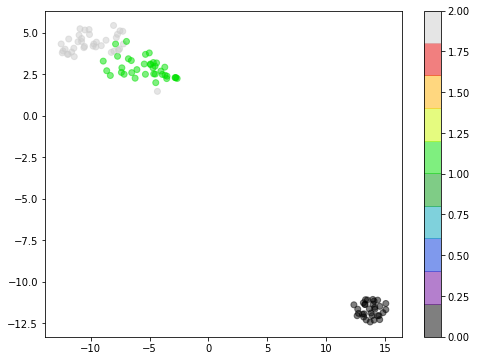

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(train_reduced[:, 0], train_reduced[:, 1], c=y_train, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.show()

###  t-SNE 不適用於新資料

PCA 降維可以適用新資料，可呼叫transform() 函式即可。而 t-SNE 則不行。因為演算法的關係在 scikit-learn 套件中的 t-SNE 演算法並沒有transform() 函式可以呼叫。